In [1]:
import numpy as np
import pandas as pd


# Creating a sample dataset with missing value
data = {
    'A': [1, 2, 100, 4, 5],
    'B': [3, np.nan, 7, 8, 9],
    'C': [np.nan, 12, 13, 14, 15],
    'D': [16, 17, 18, np.nan, 20]
}

# Convert dictionary to a pandas dataframe
df = pd.DataFrame(data)
print("Original DataFrame")
print(df)

Original DataFrame
     A    B     C     D
0    1  3.0   NaN  16.0
1    2  NaN  12.0  17.0
2  100  7.0  13.0  18.0
3    4  8.0  14.0   NaN
4    5  9.0  15.0  20.0


In [2]:
df.isnull()

,A,B,C,D
0,False,False,True,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False


In [3]:
df.isnull().sum()

A    0
B    1
C    1
D    1
dtype: int64

In [4]:
# droping rows with null values
df.dropna()

,A,B,C,D
2,100,7.0,13.0,18.0
4,5,9.0,15.0,20.0


In [5]:
df

,A,B,C,D
0,1,3.0,NaN,16.0
1,2,NaN,12.0,17.0
2,100,7.0,13.0,18.0
3,4,8.0,14.0,NaN
4,5,9.0,15.0,20.0


In [6]:
# droping columns with null values
df.dropna(axis=1)

,A
0,1
1,2
2,100
3,4
4,5


In [7]:
df.B

0    3.0
1    NaN
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [8]:
df['B']

0    3.0
1    NaN
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [9]:
df['B'].fillna(df['B'].mean())

0    3.00
1    6.75
2    7.00
3    8.00
4    9.00
Name: B, dtype: float64

In [10]:
df['B'].fillna(df['B'].median())

0    3.0
1    7.5
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [11]:
df.fillna(5)

,A,B,C,D
0,1,3.0,5.0,16.0
1,2,5.0,12.0,17.0
2,100,7.0,13.0,18.0
3,4,8.0,14.0,5.0
4,5,9.0,15.0,20.0


In [12]:
df['B'].fillna(5)

0    3.0
1    5.0
2    7.0
3    8.0
4    9.0
Name: B, dtype: float64

In [13]:
df['B'].fillna("Rishabh")

0        3.0
1    Rishabh
2        7.0
3        8.0
4        9.0
Name: B, dtype: object

In [14]:
df

,A,B,C,D
0,1,3.0,NaN,16.0
1,2,NaN,12.0,17.0
2,100,7.0,13.0,18.0
3,4,8.0,14.0,NaN
4,5,9.0,15.0,20.0


In [15]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df.shape

(891, 15)

In [18]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [19]:
df.dropna().shape

(182, 15)

In [20]:
df.dropna(axis=1).shape

(891, 11)

In [21]:
# imputation of missing value
df.isnull().sum()   #age is missing at random

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

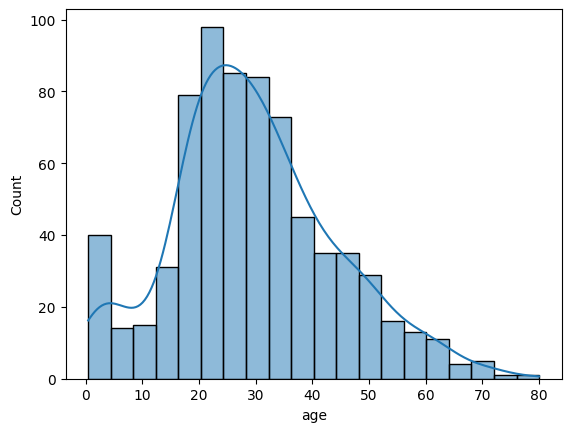

In [22]:
sns.histplot(df.age, kde = True)

In [23]:
# IT LOOKS LIKE NORMAL DISTRIBUTION MEANS THERE IS NO OUTLIER
# Whenever you have normal distribution data and no outlier imput with mean.

df['mean_imputation'] = df['age'].fillna(df.age.mean())

In [24]:
df[['age','mean_imputation']]

,age,mean_imputation
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


C:\Users\ru336\AppData\Local\Temp\ipykernel_11332\2229092295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mean_imputation,kde = True)


<Axes: xlabel='mean_imputation', ylabel='Density'>

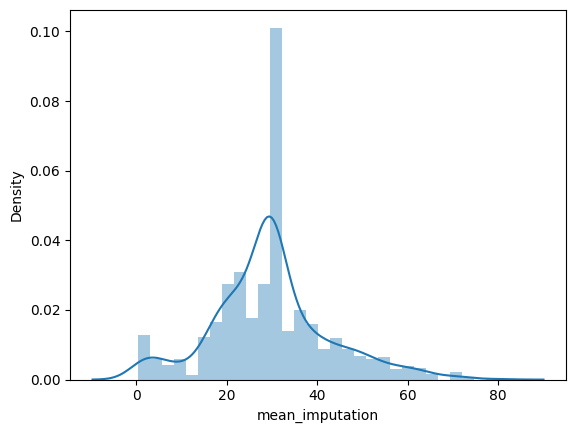

In [25]:
sns.distplot(df.mean_imputation,kde = True)

In [26]:
# Mean imputatyion works well with normally destributated data and no outlier in data with.

# Median imputation
df['median_imputation'] = df['age'].fillna(df.age.median())
df.median_imputation

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: median_imputation, Length: 891, dtype: float64

In [27]:
# Imputation of categorical data
df.isnull().sum()

survived               0
pclass                 0
sex                    0
age                  177
sibsp                  0
parch                  0
fare                   0
embarked               2
class                  0
who                    0
adult_male             0
deck                 688
embark_town            2
alive                  0
alone                  0
mean_imputation        0
median_imputation      0
dtype: int64

In [28]:
df['embarked']   #MCR---->impute with mode value

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [29]:
df['embarked'].nunique()   #to know number of categories

3

In [30]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
df[df['embarked'].isnull()]   #missing complitly at random

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_imputation,median_imputation
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [32]:
# Howmany not null value is there
df.notna().sum()

survived             891
pclass               891
sex                  891
age                  714
sibsp                891
parch                891
fare                 891
embarked             889
class                891
who                  891
adult_male           891
deck                 203
embark_town          889
alive                891
alone                891
mean_imputation      891
median_imputation    891
dtype: int64

In [33]:
df[df['embarked'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,mean_imputation,median_imputation
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [34]:
df[df['embarked'].notna()]['embarked'].mode()

0    S
Name: embarked, dtype: object

In [35]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [36]:
df['embarked'].fillna(mode_value)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object